In [123]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/individual-carbon-footprint-calculation/Carbon Emission.csv


# Contents
* Loading data
* Data preprocessing
* Machine Learning Model Building
* Neural Network Model Building
* Comparison

# Importing the libraries  

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# Importing the dataset

In [125]:
data = pd.read_csv("/kaggle/input/individual-carbon-footprint-calculation/Carbon Emission.csv")
pd.set_option('display.max_columns', None)
data

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,NaN,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574


# Basic EDA

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [127]:
data.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


We can see that whoever doesn't drive a vehicle has NaN values. We will fix it by replacing those values

In [128]:
data.replace(np.nan, 'None', inplace=True)

In [129]:
data.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


**Take care of missing data**

In [130]:
data.isna().sum()

Body Type                        0
Sex                              0
Diet                             0
How Often Shower                 0
Heating Energy Source            0
Transport                        0
Vehicle Type                     0
Social Activity                  0
Monthly Grocery Bill             0
Frequency of Traveling by Air    0
Vehicle Monthly Distance Km      0
Waste Bag Size                   0
Waste Bag Weekly Count           0
How Long TV PC Daily Hour        0
How Many New Clothes Monthly     0
How Long Internet Daily Hour     0
Energy efficiency                0
Recycling                        0
Cooking_With                     0
CarbonEmission                   0
dtype: int64

**Take care of categorical data**

In [131]:
data.dtypes

Body Type                        object
Sex                              object
Diet                             object
How Often Shower                 object
Heating Energy Source            object
Transport                        object
Vehicle Type                     object
Social Activity                  object
Monthly Grocery Bill              int64
Frequency of Traveling by Air    object
Vehicle Monthly Distance Km       int64
Waste Bag Size                   object
Waste Bag Weekly Count            int64
How Long TV PC Daily Hour         int64
How Many New Clothes Monthly      int64
How Long Internet Daily Hour      int64
Energy efficiency                object
Recycling                        object
Cooking_With                     object
CarbonEmission                    int64
dtype: object

In [132]:
data.nunique()

Body Type                           4
Sex                                 2
Diet                                4
How Often Shower                    4
Heating Energy Source               4
Transport                           3
Vehicle Type                        6
Social Activity                     3
Monthly Grocery Bill              250
Frequency of Traveling by Air       4
Vehicle Monthly Distance Km      4003
Waste Bag Size                      4
Waste Bag Weekly Count              7
How Long TV PC Daily Hour          25
How Many New Clothes Monthly       51
How Long Internet Daily Hour       25
Energy efficiency                   3
Recycling                          16
Cooking_With                       16
CarbonEmission                   3509
dtype: int64

In [133]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])


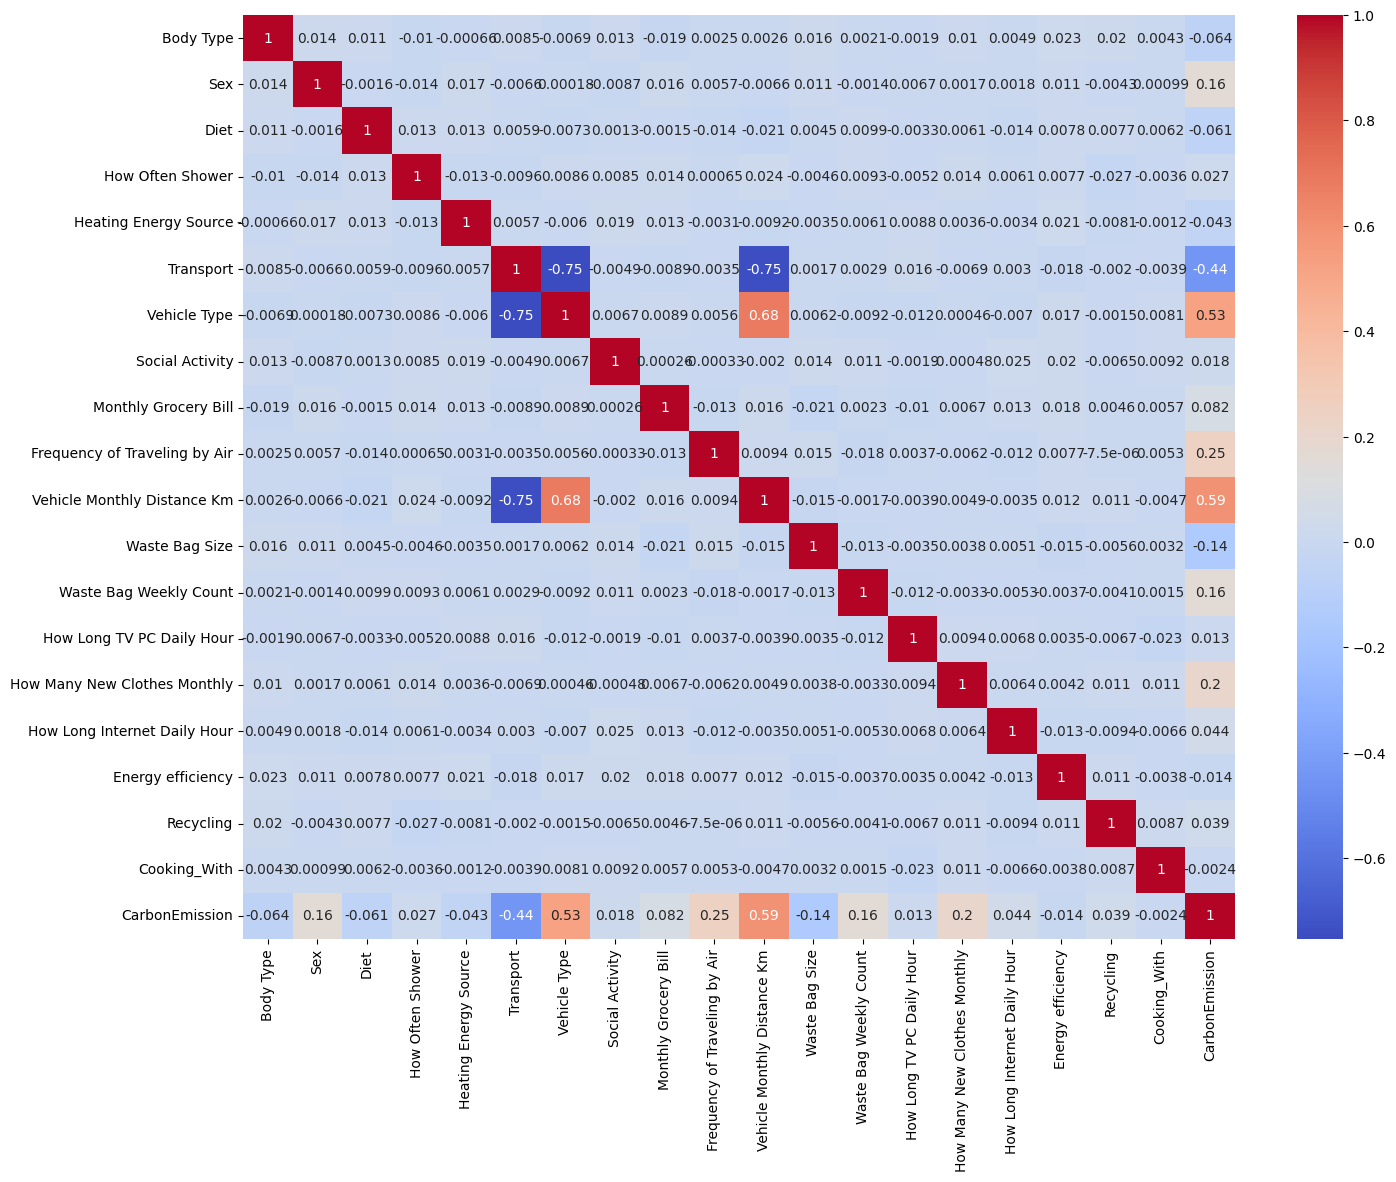

In [134]:
correlations = data.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

# Machine Learning Model 

In [135]:
X = data.iloc[:, :-1].values

In [136]:
y = data.iloc[:,-1].values

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

We will scale the data

In [138]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
from sklearn.linear_model import LinearRegression
X_test = sc.transform(X_test)

In order to find the best algorithm we will create 5 regression models and we will compare them based on r_squared and mean absolute error

In [139]:
linearregression = LinearRegression()
decisiontreeregression = DecisionTreeRegressor()
supportvectorregression = SVR(kernel='rbf')
randomforestregression = RandomForestRegressor()
xgbregression = XGBRegressor()

linearregression.fit(X_train, y_train)
decisiontreeregression.fit(X_train, y_train)
supportvectorregression.fit(X_train, y_train)
randomforestregression.fit(X_train, y_train)
xgbregression.fit(X_train, y_train)

y_lin = linearregression.predict(X_test)
y_dectree = decisiontreeregression.predict(X_test)
y_supvec = supportvectorregression.predict(X_test)
y_randfor = randomforestregression.predict(X_test)
y_xgb = xgbregression.predict(X_test)


In [140]:
data1 = {"Regression Algorithms": ["Linear Regression", "Decision Tree Regression", 
                                       "Support Vector Regression", "Random Forest Classifier",
                                       "XGB Regression"],
      "Score": [r2_score(y_test,y_lin), r2_score(y_test, y_dectree), 
                r2_score(y_test, y_supvec), r2_score(y_test,y_randfor),
                r2_score(y_test, y_xgb) ]}

score = pd.DataFrame(data1)
print('r_squared metrics')
print(score)

r_squared metrics
       Regression Algorithms     Score
0          Linear Regression  0.605501
1   Decision Tree Regression  0.795440
2  Support Vector Regression  0.105251
3   Random Forest Classifier  0.911807
4             XGB Regression  0.975728


Using r_squared, we prefer the model with a score closest to 1. Thus, XGBoost Regression seems the best model

In [141]:
data2 = {"Regression Algorithms": ["Linear Regression", "Decision Tree Regression", 
                                       "Support Vector Regression", "Random Forest Classifier",
                                       "XGB Regression"],
      "Score": [mean_absolute_error(y_test,y_lin), mean_absolute_error(y_test, y_dectree), 
                mean_absolute_error(y_test, y_supvec), mean_absolute_error(y_test,y_randfor),
                mean_absolute_error(y_test, y_xgb) ]}


score2 = pd.DataFrame(data2)
print('mean absolute error')
print(score2)

mean absolute error
       Regression Algorithms       Score
0          Linear Regression  524.908445
1   Decision Tree Regression  354.308500
2  Support Vector Regression  725.583154
3   Random Forest Classifier  234.354540
4             XGB Regression  120.023525


Our assumption is also validated by mean absolute error.

# Neural Network Model

In [142]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [143]:
model = Sequential()

model.add(Dense(256, activation='relu',input_dim=19))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))

In [144]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 256)               5120      
                                                                 
 dense_65 (Dense)            (None, 512)               131584    
                                                                 
 dense_66 (Dense)            (None, 512)               262656    
                                                                 
 dense_67 (Dense)            (None, 512)               262656    
                                                                 
 dense_68 (Dense)            (None, 1)                 513       
                                                                 
Total params: 662529 (2.53 MB)
Trainable params: 662529 (2.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [145]:
model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])

In [146]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 3s 9ms/step - loss: 635.8334 - mean_absolute_error: 635.8334
Epoch 2/50
250/250 [==============================] - 2s 9ms/step - loss: 334.1545 - mean_absolute_error: 334.1545
Epoch 3/50
250/250 [==============================] - 2s 9ms/step - loss: 304.8341 - mean_absolute_error: 304.8341
Epoch 4/50
250/250 [==============================] - 2s 9ms/step - loss: 255.6629 - mean_absolute_error: 255.6629
Epoch 5/50
250/250 [==============================] - 2s 9ms/step - loss: 232.7879 - mean_absolute_error: 232.7879
Epoch 6/50
250/250 [==============================] - 2s 9ms/step - loss: 220.0463 - mean_absolute_error: 220.0463
Epoch 7/50
250/250 [==============================] - 2s 9ms/step - loss: 205.7614 - mean_absolute_error: 205.7614
Epoch 8/50
250/250 [==============================] - 2s 9ms/step - loss: 181.6317 - mean_absolute_error: 181.6317
Epoch 9/50
250/250 [==============================] - 2s 9ms/step - loss: 153.65

We can now predict the test set.

In [147]:
y_ann = model.predict(X_test)

63/63 [==============================] - 0s 4ms/step


In [148]:
mean_absolute_error(y_test, y_ann)

113.75779629516602

# Conclusion

**By comparing the mean absolute error, turns out that our neural network outperforms every regression algorithm**